# Tack Wiz Farm on Banana Depot

In this experiment conducted on June 25, 2023, we compare three different iterations of Quincy Tack Wizard Farm on Banana Depot. In all three, we assume for defense that the player adheres to the following flowchart: 

| Round | Defense |
|-------|---------|
| 1 | 1 x 020 tack + Quincy |
| 3 | 1 x 220 tack + Quincy |
| 5 | 1 x 230 tack + Quincy |
| 9 | 1 x 230 tack + 1 x 022 wizard + Quincy |
| 11 | 1 x 024 wizard + Quincy |


In [37]:
import b2sim as b2
import copy

In [38]:
rounds = b2.Rounds(0.1)

buy_queue = [

    #Buy 020 tack + Quincy
    [b2.buyDefense((280+100+225)+(450), message = "R1 def")],

    #Upgrade the tack to 220
    [b2.buyDefense(150+400, message = "220 tack")],

    #Remove the more expensive barrier, which gives access to the good necro spot, then place a 000 farm
    [b2.buyDefense(500, message = "remove barrier"), b2.buyFarm()],

    #Upgrade the tack to 230
    [b2.buyDefense(700, min_buy_time = rounds.getTimeFromRound(5), message = "230 tack")],

    #Upgrade the farm to 300
    [b2.upgradeFarm(0,0)],
    [b2.upgradeFarm(0,0)],
    [b2.upgradeFarm(0,0)],

    #Purchase an 022 wizard
    [b2.buyDefense(400 + 300 + 300 + 900, message = "022 wiz")],

    #Sell the tack shooter and then upgrade the necromancer to 024.
    [b2.buyDefense(1500+2800 - 0.7*(1855), min_buy_time = rounds.getTimeFromRound(10))]
]

def foo(stopping_time, rounds, buy_queue):

    #Returns true or false depending on whether we are able to afford all of our upgrades by the ending simulation time

    eco_queue = [
        b2.ecoSend(rounds.getTimeFromRound(1), 'Grouped Reds'),
        b2.ecoSend(rounds.getTimeFromRound(4), 'Spaced Pinks'),
        b2.ecoSend(rounds.getTimeFromRound(5), 'Spaced Whites'),
        b2.ecoSend(stopping_time, 'Zero')
    ]

    initial_state_game = {
        'Cash': 650,
        'Eco': 250,
        'Eco Send': 'Zero',
        'Rounds': rounds,
        'Game Round': 0,
        'Buy Queue': buy_queue,
        'Eco Queue': copy.deepcopy(eco_queue)
    }

    game_state = b2.GameState(initial_state_game)
    game_state.fastForward(target_round = 11)

    if len(game_state.buy_queue) > 0:
        return False
    else:
        return True

In [39]:
#Determine the *best* stopping time
stopping_time_low = rounds.getTimeFromRound(6)
stopping_time_high = rounds.getTimeFromRound(9)
iterations = 25

for i in range(iterations):
    c = 0.5*(stopping_time_low + stopping_time_high)

    if foo(c, rounds, copy.deepcopy(buy_queue)) == True:
        stopping_time_low = c
    else:
        stopping_time_high = c

In [40]:
min_stopping_time = 0.5*(stopping_time_low + stopping_time_high)
print("The maximum stopping time for the simulation is %s"%('{0:.1f}'.format(min_stopping_time)))

current_round = rounds.getRoundFromTime(min_stopping_time)
current_round_time = min_stopping_time - rounds.round_starts[current_round]
print("This stopping time occurs %s seconds into round %s"%(current_round_time, current_round))

The maximum stopping time for the simulation is 175.2
This stopping time occurs 1.8499996796250286 seconds into round 8


The current cash and eco are (8.099999999984902,513.7999999999994)


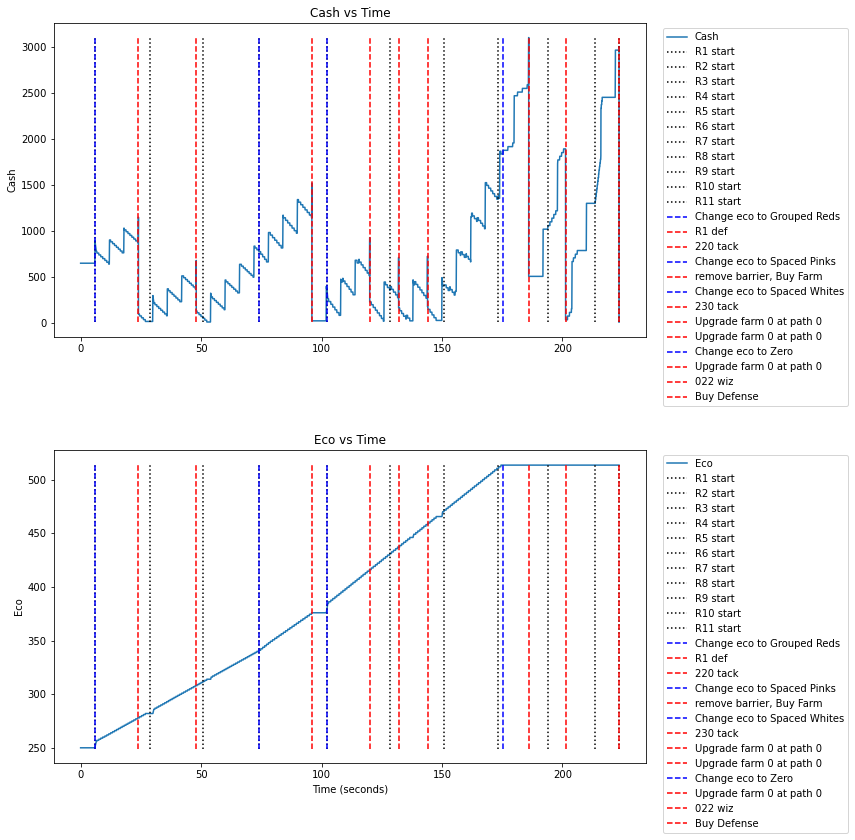

In [41]:
eco_queue = [
    b2.ecoSend(rounds.getTimeFromRound(1), 'Grouped Reds'),
    b2.ecoSend(rounds.getTimeFromRound(4), 'Spaced Pinks'),
    b2.ecoSend(rounds.getTimeFromRound(5), 'Spaced Whites'),
    b2.ecoSend(min_stopping_time, 'Zero')
]

initial_state_game = {
    'Cash': 650,
    'Eco': 250,
    'Eco Send': 'Zero',
    'Rounds': rounds,
    'Game Round': 0,
    'Buy Queue': buy_queue,
    'Eco Queue': eco_queue
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 11)
game_state.viewCashEcoHistory((12,12))
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'qtwf_depot')